# impor library

In [1]:
import pandas as pd 
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset

In [2]:
#import dataset
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ','-']
data = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

# preprocessing

## membaca data

In [3]:
# melihat data
data.head(2) 

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


Melihat 5 baris terbawah

In [4]:
data.tail(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,NaN,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
# nama kolom
print("kolom : ", data.columns)

kolom :  Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [6]:
# banyaknya data
print(data.shape)

(84548, 22)


In [7]:
# info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

## mengkonversi tipe data

In [8]:
# menghapus kolom 'unnamed: o' karena merupakan no data yang dapat digantikan dengan nomor kolom
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data.shape)

(84548, 21)


In [9]:
# melabeli nama daerah dengan angka
data['BOROUGH'] = data['BOROUGH'].map({1:'Manhattan',2:'Bronx',3:'Brooklyn',4:'Queens',5:'Staten Island'})

In [10]:
#konversi ke datetime pada kolom yang menunjukan date
data['SALE DATE']= pd.to_datetime(data['SALE DATE'], errors='coerce')
data['SALE YEAR']  = data['SALE DATE'].dt.year
data['SALE MONTH'] = data['SALE DATE'].dt.month

In [11]:
#konversi tipe data ke int
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "YEAR BUILT", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [12]:
#konversi ke data kategorikal
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    data[col] = data[col].astype("category")

## data yang terduplikat

In [13]:
# data yang ada duplicatenya
data.duplicated().any()

True

In [14]:
# jumlah data yang ada duplikatnya
data.duplicated().sum()

765

In [15]:
# menghapus data yang terduplikat
data.drop_duplicates(inplace=True)
data.duplicated().sum() # no more duplicates

0

## data yang hilang

In [16]:
# mengecek data yang hilang
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         83783
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
SALE YEAR                             0
SALE MONTH                            0
dtype: int64

In [17]:
# presentase data yang hilang
data.isna().sum() /len(data) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.880847
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.880847
ADDRESS                             0.000000
APARTMENT NUMBER                   77.502596
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.097001
GROSS SQUARE FEET                  32.685628
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         16.919900
SALE DATE                           0.000000
SALE YEAR                           0.000000
SALE MONTH

Diketahui bahwa % data yang hilang sebagai berikut :
- EASE-MENT"   = 99%         
- APARTMENT NUMBER = 76% 
-  LAND SQUARE FEET = 30% 
- GROSS SQUARE FEET = 32% 
- SALE PRICE = 16%
    - data EASE-MENT dan apartment number memiliki % data hilang yang tinggi yang dapat mengganggu analisis sehingga data dapat dihapus dari dataset

In [18]:
# menghapus apartment number dan ease-ment
data.drop(columns=['APARTMENT NUMBER','EASE-MENT'], inplace=True)

In [19]:
# mengisi data yang hilang dengan nilai modus karena merupakan data tipe  kategorikal
data['TAX CLASS AT PRESENT'].fillna(data['TAX CLASS AT PRESENT'].mode()[0], inplace=True)
data['BUILDING CLASS AT PRESENT'].fillna(data['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

In [20]:
# mengisi data yang hilang dengan nilai median karena merupakan data tipe  numerik
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].median(), inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].median(), inplace=True)

In [21]:
# mengganti nilai 0 dengan nan pada kolom yang tidak relevan berisi 0
data['ZIP CODE']=data['ZIP CODE'].replace({0:np.nan})
data['YEAR BUILT']=data['YEAR BUILT'].replace({0:np.nan})
data['SALE PRICE']=data['SALE PRICE'].replace({0:np.nan})

In [22]:
# menghapus data yang kosong lainnya
dataa = data.dropna()
dataa.dropna(inplace=True)
dataa.isnull().sum()

/tmp/ipykernel_15552/3168256933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa.dropna(inplace=True)


BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
SALE YEAR                         0
SALE MONTH                        0
dtype: int64

## deskripsi data setelah cleaning

In [23]:
dataa.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE YEAR,SALE MONTH
count,55256.000000,55256.000000,55256.000000,55256.000000,55256.000000,5.525600e+04,5.525600e+04,55256.000000,5.525600e+04,55256.000000,55256.000000
mean,4246.103971,326.769256,1.804202,0.165756,1.979713,3.037339e+03,2.930826e+03,1950.736463,1.472227e+06,2016.657250,6.548737
std,3594.176515,588.377197,14.600577,10.042944,17.831269,2.796504e+04,2.464390e+04,34.337036,1.258866e+07,0.474633,3.448788
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1111.000000,1.000000e+00,2016.000000,1.000000
25%,1333.000000,20.000000,0.000000,0.000000,0.000000,2.000000e+03,1.344000e+03,1925.000000,3.720360e+05,2016.000000,4.000000
50%,3292.000000,47.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1949.000000,6.210000e+05,2017.000000,6.000000
75%,6255.000000,203.000000,2.000000,0.000000,2.000000,2.523000e+03,1.938000e+03,1970.000000,1.030000e+06,2017.000000,10.000000
max,16319.000000,9002.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09,2017.000000,12.000000


In [24]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55256 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         55256 non-null  category      
 1   NEIGHBORHOOD                    55256 non-null  category      
 2   BUILDING CLASS CATEGORY         55256 non-null  category      
 3   TAX CLASS AT PRESENT            55256 non-null  category      
 4   BLOCK                           55256 non-null  int64         
 5   LOT                             55256 non-null  int64         
 6   BUILDING CLASS AT PRESENT       55256 non-null  category      
 7   ADDRESS                         55256 non-null  object        
 8   ZIP CODE                        55256 non-null  category      
 9   RESIDENTIAL UNITS               55256 non-null  int64         
 10  COMMERCIAL UNITS                55256 non-null  int64         
 11  TO

# measure of central tendency

## mean

In [25]:
# mean sale price
mean_SP = dataa['SALE PRICE'].mean()
print("Mean Sale Price : ", mean_SP)

Mean Sale Price :  1472227.0172108007


In [26]:
# mean sale price setiap borough
dataa.groupby(['BOROUGH'])['SALE PRICE'].mean()

BOROUGH
Bronx            8.435075e+05
Brooklyn         1.266564e+06
Manhattan        3.408388e+06
Queens           7.271154e+05
Staten Island    5.033410e+05
Name: SALE PRICE, dtype: float64

## median

In [27]:
# median sale price
median_SP = dataa['SALE PRICE'].median()
print("Median Sale Price : ", median_SP)

Median Sale Price :  621000.0


In [28]:
# median sale price setiap borough
dataa.groupby(['BOROUGH'])['SALE PRICE'].median()

BOROUGH
Bronx             420000.0
Brooklyn          755000.0
Manhattan        1115000.0
Queens            498000.0
Staten Island     465213.0
Name: SALE PRICE, dtype: float64

## mode

**Mode pada data kategorikal?**

In [29]:
# mode pada tiap kategorikal

mode_borough            = statistics.mode(dataa['BOROUGH'])
mode_Neighborhood       = statistics.mode(dataa['NEIGHBORHOOD'])
mode_BuildClassCategory = statistics.mode(dataa['BUILDING CLASS CATEGORY'])
mode_BuildClassAP       = statistics.mode(dataa['BUILDING CLASS AT PRESENT'])
mode_Tax = statistics.mode(dataa['TAX CLASS AT TIME OF SALE'])
mode_BD = statistics.mode(dataa['BUILDING CLASS AT TIME OF SALE'])
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Building Class Category         :" , mode_BuildClassCategory )
print("Mode Building Class at Present       :" , mode_BuildClassAP )
print("Mode Tax Class at Time of Sale       :" , mode_Tax)
print("Mode Building Class at Time of Sale  :" , mode_BD)

Mode Borough                         : Queens
Mode Neighborhood                    : FLUSHING-NORTH
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    
Mode Building Class at Present       : D4
Mode Tax Class at Time of Sale       : 2
Mode Building Class at Time of Sale  : D4


# measure of spread

## range

In [30]:
# range pada sale price
range_price = np.ptp(dataa['SALE PRICE'])
print("Range dari Sale Price : ",range_price)

Range dari Sale Price :  2209999999.0


In [31]:
# range pada gross square feet
range_gsf = np.ptp(dataa['GROSS SQUARE FEET'])
print("Range dari Gross Square Feet : ",range_gsf)

Range dari Gross Square Feet :  3750565.0


In [32]:
# range pada land square feet
range_lsf = np.ptp(dataa['LAND SQUARE FEET'])
print("Range dari Land Square Feet : ", range_lsf)

Range dari Land Square Feet :  4228300.0


## variance

In [33]:
# variace pada data numerik
v_p = statistics.variance(dataa['SALE PRICE'])
v_gsf = statistics.variance(dataa['GROSS SQUARE FEET'])
v_lsf = statistics.variance(dataa['LAND SQUARE FEET'])
v_ru = statistics.variance(dataa['RESIDENTIAL UNITS'])
v_cu = statistics.variance(dataa['COMMERCIAL UNITS'])
v_tu = statistics.variance(dataa['TOTAL UNITS'])
print("Variance Sale Price        : ", v_p)
print("Variance Gross Square Feet : ", v_gsf)
print("Variance Land Square Feet  : ", v_lsf)
print("Variance Residential Units : ", v_ru)
print("Variance Commercial Units  : ", v_cu)
print("Variance Total Units       : ", v_tu)

Variance Sale Price        :  158474270306171.75
Variance Gross Square Feet :  607321838.1464214
Variance Land Square Feet  :  782043194.2824746
Variance Residential Units :  213.17684669687011
Variance Commercial Units  :  100.86071564636087
Variance Total Units       :  317.95414456313915


## standard deviation

In [34]:
std_p   = statistics.stdev(dataa['SALE PRICE'])
std_gsf = statistics.stdev(dataa['GROSS SQUARE FEET'])
std_lsf = statistics.stdev(dataa['LAND SQUARE FEET'])
std_ru  = statistics.stdev(dataa['RESIDENTIAL UNITS'])
std_cu  = statistics.stdev(dataa['COMMERCIAL UNITS'])
std_tu  = statistics.stdev(dataa['TOTAL UNITS'])
print("Standar Deviasi Sale Price        : ", std_p)
print("Standar Deviasi Gross Square Feet : ", std_gsf)
print("Standar Deviasi Land Square Feet  : ", std_lsf)
print("Standar Deviasi Residential Units : ", std_ru)
print("Standar Deviasi Commercial Units  : ", std_cu)
print("Standar Deviasi Total Units       : ", std_tu)

Standar Deviasi Sale Price        :  12588656.413858142
Standar Deviasi Gross Square Feet :  24643.900627668936
Standar Deviasi Land Square Feet  :  27965.035209748523
Standar Deviasi Residential Units :  14.60057693027471
Standar Deviasi Commercial Units  :  10.042943574787268
Standar Deviasi Total Units       :  17.831268731168265


# probability distribution

## normal Distribution

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

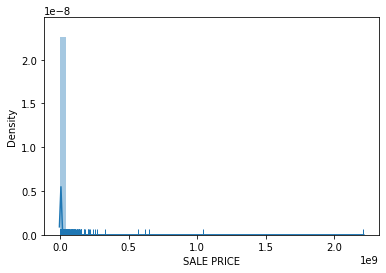

In [35]:
# distribution sale price
sns.distplot(dataa['SALE PRICE'], kde=True, rug=True)

In [36]:
# data sale price pada rentang 10.000 - 10.000.000
datasal = dataa[(dataa['SALE PRICE'] > 100000) & (dataa['SALE PRICE'] < 10000000)]

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

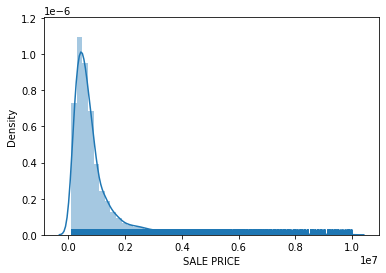

In [37]:
# distribusi
sns.distplot(datasal['SALE PRICE'], kde=True, rug=True)

/tmp/ipykernel_15552/4065478517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasal['SALE PRICE'] = np.log(datasal['SALE PRICE'])
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

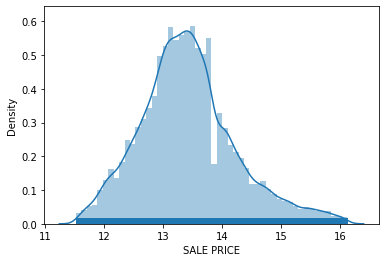

In [38]:
# diubah ke bentuk logaritma untuk memperbaiki data
datasal['SALE PRICE'] = np.log(datasal['SALE PRICE'])
# distribusi
sns.distplot(datasal['SALE PRICE'], kde=True, rug=True)

# confidence intervals

## calculation of CI of mean

**Bagaiamana Confidence Interval untuk Sale Price Wilayah Staten Island?**

In [39]:
dataa.groupby("BOROUGH").agg({"SALE PRICE":[np.mean, np.std, np.size]})

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          8.435075e+05  3.350941e+06   4740
Brooklyn       1.266564e+06  3.861973e+06  14260
Manhattan      3.408388e+06  2.545039e+07  12766
Queens         7.271154e+05  2.966921e+06  17674
Staten Island  5.033410e+05  4.661293e+05   5816

In [40]:
dataa.groupby("BOROUGH")["SALE PRICE"].describe().T

BOROUGH,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,4.740000e+03,1.426000e+04,1.276600e+04,1.767400e+04,5.816000e+03
mean,8.435075e+05,1.266564e+06,3.408388e+06,7.271154e+05,5.033410e+05
std,3.350941e+06,3.861973e+06,2.545039e+07,2.966921e+06,4.661293e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.457500e+05,4.450000e+05,6.490000e+05,2.850000e+05,3.320000e+05
50%,4.200000e+05,7.550000e+05,1.115000e+06,4.980000e+05,4.652130e+05
75%,5.800000e+05,1.262170e+06,2.400000e+06,7.800000e+05,6.000000e+05
max,1.100000e+08,1.542500e+08,2.210000e+09,2.575000e+08,1.190000e+07


In [41]:
mean_br = 5.033 #mean cholestrol of female
sd = 4.66       #standard deviation for female population
n = 5816          #total number of female
z = 1.96         #z-score from the z table mentioned before

In [42]:
se = sd/np.sqrt(n)
se

0.06110457358776431

In [43]:
lcb = mean_br - z * se #lower limit of the CI
ucb = mean_br  + z * se#upper limit of the CI
lcb, ucb

(4.913235035767983, 5.152764964232018)

Diperoleh Confidence Interval adalah 4.91-5.15.

# hypothesis testing

apakah terdapat perbedaan signifikan sale price pada wilayah quens dan State island?

In [44]:
import statsmodels.api as sm

In [45]:
hiq = dataa[dataa["BOROUGH"] == "Queens"]
his = dataa[dataa["BOROUGH"] == "Staten Island"]

In [46]:
n1 = len(hiq)
mu1 = hiq["SALE PRICE"].mean()
sd1 = hiq["SALE PRICE"].std()

(n1, mu1, sd1)

(17674, 727115.4420052054, 2966921.3534063147)

In [47]:
n2 = len(his)
mu2 = his["SALE PRICE"].mean()
sd2 = his["SALE PRICE"].std()

(n2, mu2, sd2)

(5816, 503340.98607290233, 466129.2669375476)

In [48]:
sm.stats.ztest(hiq["SALE PRICE"].dropna(), his["SALE PRICE"].dropna(),alternative='two-sided')

(5.728672801436983, 1.0121941216840619e-08)

Karena p-value (1.01..) sangat kecil, kita dapat reject the Null hypothesis. Kita menggunakan alternative="two-sided" dalam z-theest karena disni kita memerika ketidaksamaan

## normality tests

In [49]:
ht_tu = dataa[dataa['TOTAL UNITS']!= 0]['TOTAL UNITS']

In [50]:
ht_lsf = dataa[dataa['LAND SQUARE FEET']!= 0]['GROSS SQUARE FEET']

### shapiro-wilk test

In [51]:
from scipy.stats import shapiro
stat, p = shapiro(ht_tu )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Normal Dist')
else:
    print('Probably not Normal Dist')

stat=0.038, p=0.000
Probably not Normal Dist


/home/jefl5/.local/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [52]:
from scipy.stats import shapiro
stat, p = shapiro(ht_lsf )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Normal Dist')
else:
    print('Probably not Normal Dist')

stat=0.034, p=0.000
Probably not Normal Dist


### d’agostino’s K^2 Test

In [53]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(ht_tu)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=136766.933, p=0.000
Probably not Gaussian


In [54]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(ht_lsf)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=177325.291, p=0.000
Probably not Gaussian
